In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# percent cover data
df_pc = pd.read_table('relevant/percent_cover_zipcode.txt', delimiter = ',')
df_pc.columns = ['zip', 'pc_cover']
df_pc_nyc = df_pc.loc[(df_pc['zip'] >= 10001) & (df_pc['zip'] <= 11697)]
df_cities_zips = pd.read_csv('relevant/us_cities_zips.csv')

# nyc zip codes: 10001 to 11697
df_zip_nyc = df_cities_zips.loc[(df_cities_zips['zip_code'] >= 10001) & (df_cities_zips['zip_code'] <= 11697)]
df_zip_nyc_relevant = df_zip_nyc[['zip_code', 'population', 'density']]
df_zip_nyc_relevant.columns = ['zip', 'population', 'density']

# merge datasets
combined = pd.merge(df_zip_nyc_relevant, df_pc_nyc, how="outer")
combined = combined.dropna()

In [3]:
# covid data
df_hosprate = pd.read_csv('relevant/covid/hosprate-by-modzcta.csv')
df_deathrate = pd.read_csv('relevant/covid/deathrate-by-modzcta.csv')
df_percentpos = pd.read_csv('relevant/covid/percentpositive-by-modzcta.csv')

# df_hosprate = df_hosprate.transpose()
# df_hosprate.columns = df_hosprate.iloc[0]
# df_hosprate.drop(df_hosprate.index[0])
# get covid stats [hosp rate, death rate, percent pos] averaged by zip code across all months in 2020-current
temp = []
cols = df_hosprate.columns
for i in range(7, len(cols)):
    hosp_avg = np.nanmean(list(df_hosprate[df_hosprate.columns[i]]))
    death_avg = np.nanmean(list(df_deathrate[df_deathrate.columns[i]]))
    percentpos_avg = np.nanmean(list(df_percentpos[df_percentpos.columns[i]]))
    temp.append([cols[i][-5:], hosp_avg, death_avg, percentpos_avg])
    
covid_data = pd.DataFrame(data = temp, columns = ['zip', 'hosp_avg', 'death_avg', 'percentpos_avg'])
covid_data['zip']=covid_data['zip'].astype(int)
df_combined = combined.merge(covid_data, left_on='zip', right_on='zip')

In [7]:
df_combined.corr()

,zip,population,density,pc_cover,hosp_avg,death_avg,percentpos_avg
zip,1.000000,0.129937,-0.497263,-0.089982,0.253898,0.378413,0.438812
population,0.129937,1.000000,0.167139,-0.162176,0.193378,0.326682,0.006114
density,-0.497263,0.167139,1.000000,-0.198399,-0.356450,-0.288728,-0.475898
pc_cover,-0.089982,-0.162176,-0.198399,1.000000,0.109307,-0.022119,0.080533
hosp_avg,0.253898,0.193378,-0.356450,0.109307,1.000000,0.745045,0.446150
death_avg,0.378413,0.326682,-0.288728,-0.022119,0.745045,1.000000,0.328625
percentpos_avg,0.438812,0.006114,-0.475898,0.080533,0.446150,0.328625,1.000000


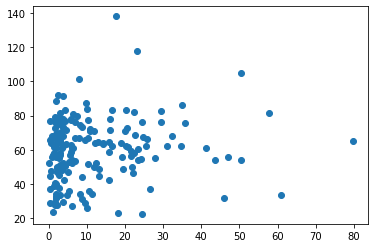

In [6]:
plt.scatter(df_combined['pc_cover'], df_combined['hosp_avg'])